## Session 5: Edge Detection

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__Import image__

In [2]:
fname = os.path.join("..", "data", "img", "coins.png")

In [3]:
image = cv2.imread(fname)

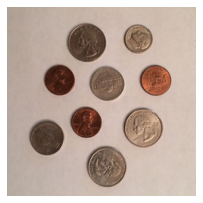

In [4]:
jimshow(image)

__Make the image greyscale__

In [5]:
# Converting the image into a greyscale image
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

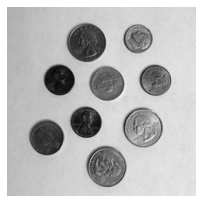

In [6]:
# Because we now have a greyscale image, we have to use the jimshow_channel function
jimshow_channel(grey_image)

## Sobel Operators

We need two Sobel kernels. One for the horizontal axis (x-axis) and one for the vertical axis (y-axis). For that we use this function: ```cv2.Sobel(image, kernel x-axis, y-axis)```

When specifying the Sobel kernel we are creating a performing Sobel kernel on the image using 64bit floating numbers. The numbers for arrays in OpenCV are unsigned 8bit integers, which means that they can only be positive. We want negative numbers as well when performing edge detection, because we are working with a decreasing slope (going from a high intensity, white, area to a low intensity area, black), and therefore we need negative values as well, otherwise we would not be able to detect when moving from light to dark. 

In [12]:
# We create our two Sobel kernels
sobelX = cv2.Sobel(grey_image, cv2.CV_64F, 1, 0) # 1 means that we "turn on" the x-axis (horizontal) and work along that
sobelY = cv2.Sobel(grey_image, cv2.CV_64F, 0, 1) # Now we are turining on the y-axis (vertical) and working along that 
# When we define the sobel kernels, the convolutional operations are done also behind the scenes.

In [11]:
sobelX
# This is the array of the gradient. The convolution kernel operations has been done. 

array([[  0.,  12.,   6., ..., -10., -14.,   0.],
       [  0.,  11.,   4., ...,  -5., -17.,   0.],
       [  0.,   9.,   1., ...,   2., -20.,   0.],
       ...,
       [  0.,  -7.,  10., ...,  13.,  -1.,   0.],
       [  0.,  -2.,   9., ...,   9.,   2.,   0.],
       [  0.,   6.,   8., ...,   4.,   4.,   0.]])

Now we no longer want to have negative values. Hence, we want to go back to unsigned values. The orignial image only uses positive values, which is why we also only want to use positive values to extract values form the image, which is why we have to go back to unsigned values. Hence, if something is -5 we only want to return 5. 

"Unsigned intergers": positive whole numbers. 

__Why are we only interested in positive values?__ <br>
Once we want to visualize the image, pixel values are all positive values (0-255), which means that if we want to plot an image, we only want positive values. With the laplacian operator we have less information about internal structure than we did with the combined Sobel operators, because the Laplacian is less sensitive to noise. With the laplacian operator we get a clear outline of the coins. Hence, when we plot the image, we are only interested in the edges.

In [15]:
# We take our array and define the absolute magnitude in order to get rid of negative values
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
# Now we have essentially performed our edge detection.

In [16]:
# We use the hstack() to put the edges detected by the two kernels side by side
sobel_edges = np.hstack([sobelX, sobelY])

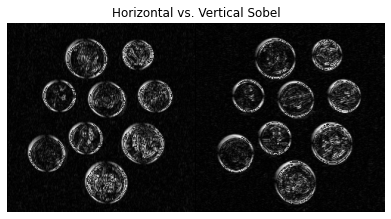

In [17]:
jimshow_channel(sobel_edges, "Horizontal vs. Vertical Sobel")

Left: we have detected horizontal edges.
Right: we have found vertical edges. 

__Combined Sobel__

Taking the horizontal and vertical sobel to combine them to show the combined sobel operator on an image. For this we use the bitwise OR operation. 

bitwise OR is used to give a TRUE value when either pixel is greater than 0.

In [18]:
sobel_combined = cv2.bitwise_or(sobelX, sobelY) # either sobelX or sobelY can be above 0

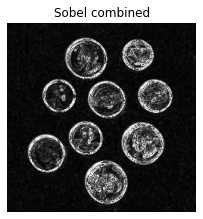

In [20]:
jimshow_channel(sobel_combined, "Sobel combined")

Here we see all the points of the original picture, where either the horizontal or the vertical sobel returns a postiive value. Hence, by combining them, we get a much more nuanced edge detection. Now we actually get some internal structure of the coins as well. 

## Laplacian Operator

Using the Laplacian kernel we do not have to define an x and a y.

In [21]:
laplace = cv2.Laplacian(grey_image, cv2.CV_64F)

In [22]:
# Making sure we are working with unsigned intergers
laplace = np.uint8(np.absolute(laplace))

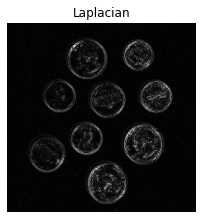

In [24]:
jimshow_channel(laplace, "Laplacian")

With the laplacian operator we have less information about internal structure than we did with the combined Sobel operators, because the Laplacian is less sensitive to noise. With the laplacian operator we get a clear outline of the coins. 

## Canny Edge Detection

Edge detection is a process with multiple steps:
1. Blurring
2. Sobel
3. Non-maximum compression
4. Thresholding


In [25]:
# Blurring
blurred = cv2.GaussianBlur(grey_image, (5,5), 0) # 5x5 kernel. The 0 indicates the amount of variation from the mean that we take into account (a kind of standard deviation)

In [26]:
# Canny edge detection with manually set thresholds 30 and 150
canny = cv2.Canny(blurred, 30, 150)

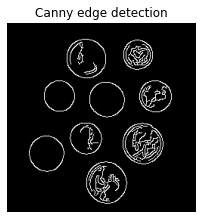

In [27]:
jimshow_channel(canny, "Canny edge detection")

Here we see that we have way less details than the original image. We now only have the outline (edges) of the coins. 

## Find Contours

Now we want to find the contours in the image. A contour is an edge which forms a continous and unbroken line around an object. Hence, the edges inside the coins will not be contours, while the outline of the coins will be detected as contours. For finding contours we use this function:

```cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) ```


cv2.RETR_EXTERNAL has to do with how contours are structured hierarchically. It performs a hierarchical structuring - we filter internal structures out and focus only on the external contours. Hence, if there are contours inside the object we filter those out, and only focus on the contours that surrounds the object itself. 

OpenCV finds contours using the CHAIN_APPROX_SIMPLE method. 



In [34]:
# Finding contours using a np function called "copy" that takes a copy of the image instead of the image itself so that we do not destroy the original image
(contours, _) = cv2.findContours(canny.copy(),
                 cv2.RETR_EXTERNAL,
                 cv2.CHAIN_APPROX_SIMPLE)

# Since we are only interested in the contours, we use a dummy variable for the other thing that the function returns

In [32]:
contours

[array([[[129, 183]],
 
        [[128, 184]],
 
        [[123, 184]],
 
        [[122, 185]],
 
        [[120, 185]],
 
        [[119, 186]],
 
        [[118, 186]],
 
        [[116, 188]],
 
        [[115, 188]],
 
        [[110, 193]],
 
        [[110, 194]],
 
        [[108, 196]],
 
        [[108, 197]],
 
        [[107, 198]],
 
        [[107, 200]],
 
        [[106, 201]],
 
        [[106, 203]],
 
        [[105, 204]],
 
        [[105, 217]],
 
        [[106, 218]],
 
        [[106, 220]],
 
        [[107, 221]],
 
        [[107, 222]],
 
        [[108, 223]],
 
        [[108, 224]],
 
        [[110, 226]],
 
        [[110, 227]],
 
        [[116, 233]],
 
        [[117, 233]],
 
        [[119, 235]],
 
        [[120, 235]],
 
        [[121, 236]],
 
        [[123, 236]],
 
        [[124, 237]],
 
        [[128, 237]],
 
        [[129, 238]],
 
        [[136, 238]],
 
        [[137, 237]],
 
        [[140, 237]],
 
        [[141, 236]],
 
        [[143, 236]],
 
        [[145, 2

# Drawing Contours

We use this function to draw to contours on the original image:

```cv2.drawContours(image, contours, fill, color, thickness)```


If you set "fill" to -1 it draws a contour for every object in the image. If you set it to 0, it only contours the first object, which allows us to look at the objects one after another. 

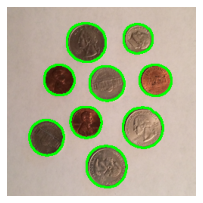

In [38]:
# We use jimshow and not jimshow_channel because we want to see the contours on the original image and not on the greyscale iamge.
jimshow(cv2.drawContours(image.copy(), # draw contours on original image
                        contours, # our list of contours
                        -1, # which contours to draw
                        (0,255,0), # 
                        2))

We have found edges and with those edges we have found contours and we have mapped these contours on the original image. 

In [40]:
# The contours are just a list
type(list)

type

In [42]:
# We can count the lenght of the list of contours which tells us how many objects are in the image
len(contours)

9

In [44]:
print(f"I can count {len(contours)} coins in the image!")

I can count 9 coins in the image!


__Conclusion__

We have actually taught a computer to count objects in an image. Hence, we can extract numerical features of an image. With image processing we can count the distribution of objects across a corpus which is useful for further analysis. 